# End-to-End Deep Learning Model for Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns

**Read the Data**

In [2]:
file_path=r'C:\Users\SHRI\Documents\Practice DS\megaminds_task\Stock_Dataset.csv'
df=pd.read_csv(file_path)
df.head(10)

,Date,Open,High,Low,Close,Volume
0,2015-01-01,100.843454,101.353611,100.045478,100.496714,1838628
1,2015-01-02,100.162444,101.435014,99.607334,100.358450,2409399
2,2015-01-05,101.536107,101.662421,101.523937,101.006138,2227933
3,2015-01-06,102.837671,103.306802,102.744797,102.529168,4014445
4,2015-01-07,102.636800,103.629666,101.365251,102.295015,4332299
5,2015-01-08,101.377900,102.823105,100.224816,102.060878,1543708
6,2015-01-09,104.246063,104.912332,103.278268,103.640091,4302036
7,2015-01-12,104.538151,105.116129,104.139159,104.407525,1792650
8,2015-01-13,103.753413,104.330776,102.703363,103.938051,1124283
9,2015-01-14,104.552305,104.680965,104.227647,104.480611,1443108


**Data Inspection**

In [3]:
df.shape

(2348, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2348 non-null   object 
 1   Open    2348 non-null   float64
 2   High    2348 non-null   float64
 3   Low     2348 non-null   float64
 4   Close   2348 non-null   float64
 5   Volume  2348 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 110.2+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,2348.000000,2348.000000,2348.000000,2348.000000,2.348000e+03
mean,138.472558,139.280414,137.664036,138.485053,3.002037e+06
std,36.644692,36.675598,36.671148,36.653759,1.171813e+06
min,82.980447,83.300412,81.639958,83.333893,1.001607e+06
25%,99.770450,100.607143,98.940602,99.871537,1.986622e+06
50%,144.565192,145.345008,143.595491,144.441228,3.021827e+06
75%,177.544531,178.457190,176.711737,177.600271,4.042974e+06
max,195.002012,195.665448,194.920720,195.498709,4.998630e+06


**Data Cleaning**

In [6]:
# removes rows that contain missing values
df=df.dropna()
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-01,100.843454,101.353611,100.045478,100.496714,1838628
1,2015-01-02,100.162444,101.435014,99.607334,100.358450,2409399
2,2015-01-05,101.536107,101.662421,101.523937,101.006138,2227933
3,2015-01-06,102.837671,103.306802,102.744797,102.529168,4014445
4,2015-01-07,102.636800,103.629666,101.365251,102.295015,4332299


In [7]:
# Calculate the missing values
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [8]:
# Covert the date into datetime
df['Date']=pd.to_datetime(df['Date'])
df.head(5)

,Date,Open,High,Low,Close,Volume
0,2015-01-01,100.843454,101.353611,100.045478,100.496714,1838628
1,2015-01-02,100.162444,101.435014,99.607334,100.358450,2409399
2,2015-01-05,101.536107,101.662421,101.523937,101.006138,2227933
3,2015-01-06,102.837671,103.306802,102.744797,102.529168,4014445
4,2015-01-07,102.636800,103.629666,101.365251,102.295015,4332299


In [9]:
# sort the date
df=df.sort_values(by='Date')
df.head(5)

,Date,Open,High,Low,Close,Volume
0,2015-01-01,100.843454,101.353611,100.045478,100.496714,1838628
1,2015-01-02,100.162444,101.435014,99.607334,100.358450,2409399
2,2015-01-05,101.536107,101.662421,101.523937,101.006138,2227933
3,2015-01-06,102.837671,103.306802,102.744797,102.529168,4014445
4,2015-01-07,102.636800,103.629666,101.365251,102.295015,4332299


In [10]:
# remove the date column for modeling
df=df.set_index('Date')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01,100.843454,101.353611,100.045478,100.496714,1838628
2015-01-02,100.162444,101.435014,99.607334,100.358450,2409399
2015-01-05,101.536107,101.662421,101.523937,101.006138,2227933
2015-01-06,102.837671,103.306802,102.744797,102.529168,4014445
2015-01-07,102.636800,103.629666,101.365251,102.295015,4332299


**Feature selection**

In [11]:
# For close price
close_prices=df[['Close']]
close_prices.head()

,Close
Date,
2015-01-01,100.496714
2015-01-02,100.358450
2015-01-05,101.006138
2015-01-06,102.529168
2015-01-07,102.295015


**Feature Scaling**

In [12]:
# Normalaization (normalization formula - min max)

from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(close_prices)

**Create Time-Series Sequences**

In [13]:
import numpy as np

def create_sequences(data, time_steps=100):
    X,y = [], []
    for i in range (time_steps, len(df)):
        X.append(df.iloc[i - time_steps:i,0])
        y.append(df.iloc[i,0])

    return  np.array(X), np.array(y)

X,y  = create_sequences(scaled_data, 100)

**Shape again the Long-Short Term Memory**

In [14]:
X= X.reshape(X.shape[0], X.shape[1],1)
X

array([[[100.84345361],
        [100.16244353],
        [101.53610658],
        ...,
        [ 89.97656554],
        [ 89.99704746],
        [ 89.49814436]],

       [[100.16244353],
        [101.53610658],
        [102.83767122],
        ...,
        [ 89.99704746],
        [ 89.49814436],
        [ 87.80809469]],

       [[101.53610658],
        [102.83767122],
        [102.63679953],
        ...,
        [ 89.49814436],
        [ 87.80809469],
        [ 87.43406167]],

       ...,

       [[179.82322852],
        [180.00617357],
        [178.75896116],
        ...,
        [190.3591644 ],
        [189.99603293],
        [188.19679727]],

       [[180.00617357],
        [178.75896116],
        [178.35202403],
        ...,
        [189.99603293],
        [188.19679727],
        [189.08174582]],

       [[178.75896116],
        [178.35202403],
        [180.05808319],
        ...,
        [188.19679727],
        [189.08174582],
        [188.24402329]]], shape=(2248, 100, 1))

**Train-Text Split**

In [18]:
split= int(0.8 * len(X))

X_train, X_text = X[:split], X[split:]
y_train, y_text = y[:split], y[split:]

**Build Baseline Model 1 -LSTM** (Long-Short Term Memory)

In [16]:
#!pip install tensorflow

In [20]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense

model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=False, input_shape = (X_train.shape[1],1)))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam' ,loss = 'mse')
history_lstm = model_lstm.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_text, y_text)
)


C:\Users\SHRI\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 18030.3301 - val_loss: 31963.2324
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 16852.2324 - val_loss: 30214.3770
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 15683.2695 - val_loss: 28559.7578
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 14789.0615 - val_loss: 27596.2754
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 14173.4219 - val_loss: 26809.5664
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 13650.6943 - val_loss: 26079.3379
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 13163.7812 - val_loss: 25389.0625
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 12700.6982 - val_loss: 24724.2324
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 12258.5664 - val_loss: 24083.2617
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 11833.6309 - val_loss: 23460.0215


**Evaluate LSTM**

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

pred_lstm = model_lstm.predict(X_text)

#Inverse scaling
pred_lstm=scaler.inverse_transform(pred_lstm)
y_test_actual = scaler.inverse_transform(y_text.reshape(-1,1))

rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, pred_lstm))
mae_lstm= mean_absolute_error(y_test_actual, pred_lstm)

print('LSTM RMSE :' , rmse_lstm)
print('LSTM MAE :', mae_lstm)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step  
LSTM RMSE : 17179.908498238387
LSTM MAE : 17173.807469538933


**Build Baseline Model 2 - CNN + LSTM**

In [24]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D 

model_cnn_lstm = Sequential()
model_cnn_lstm.add(Conv1D(filters =64, kernel_size = 3, activation = 'relu',
input_shape = (X_train.shape[1],1)))
model_cnn_lstm.add(MaxPooling1D(pool_size=2))
model_cnn_lstm.add(LSTM(50))
model_cnn_lstm.add(Dense(1))

model_cnn_lstm.compile(optimizer='adam', loss='mse')

history_cnn_lstm = model_cnn_lstm.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_text, y_text)
)

C:\Users\SHRI\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 17182.9551 - val_loss: 30583.6016
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 16055.0820 - val_loss: 29364.0547
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 15393.9541 - val_loss: 28526.1621
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 14783.1035 - val_loss: 27599.4141
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 14113.6182 - val_loss: 26643.5352
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 13445.0898 - val_loss: 25679.9023
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 12846.8701 - val_loss: 24859.6816
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 12303.9385 - val_loss: 24078.4297
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 11790.3057 - val_loss: 23333.9004
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 11302.2881 - val_loss: 22618.7031


**Evaluate CNN-LSTM**

In [25]:
pred_cnn_lstm = model_cnn_lstm.predict(X_text)
pred_cnn_lstm= scaler.inverse_transform(pred_cnn_lstm)

rmse_cnn_lstm= np.sqrt(mean_squared_error(y_test_actual, pred_cnn_lstm))
mae_cnn_lstm = mean_absolute_error(y_test_actual, pred_cnn_lstm)

print(f'CNN-LSTM RMSE : {rmse_cnn_lstm}')
print(f'CNN-LSTM MAE : {mae_cnn_lstm}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step 
CNN-LSTM RMSE : 16869.046056336356
CNN-LSTM MAE : 16862.83254278112


**Build Proposed MOdel - CNN , BiLSTM**

In [27]:
from tensorflow.keras.layers import Bidirectional, Dropout

model_proposed = Sequential()
model_proposed.add(Conv1D(filters=64, kernel_size=3, activation='relu',
                         input_shape=(X_train.shape[1],1)))
model_proposed.add(MaxPooling1D(pool_size=2))
model_proposed.add(Bidirectional(LSTM(50)))
model_proposed.add(Dropout(0.2))
model_proposed.add(Dense(1))

model_proposed.compile(optimizer='adam', loss='mse')

history_proposed= model_proposed.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_text,y_text)
)

C:\Users\SHRI\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - loss: 16629.0293 - val_loss: 29372.7285
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 15147.8018 - val_loss: 27772.1484
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 14055.5195 - val_loss: 26239.6445
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 12948.7041 - val_loss: 24663.0703
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 11920.2627 - val_loss: 23127.8750
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 10957.4287 - val_loss: 21788.9629
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 10116.7549 - val_loss: 20568.5781
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 9350.1504 - val_loss: 19432.0176
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 8632.7666 - val_loss: 18366.3496
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 7999.2964 - val_loss: 17321.8848


**Evaluate Proposed Model**

In [28]:
pred_proposed = model_proposed.predict(X_text)
pred_proposed = scaler.inverse_transform(pred_proposed)

rmse_proposed = np.sqrt(mean_squared_error(y_test_actual,pred_proposed))
mae_proposed = mean_absolute_error(y_test_actual, pred_proposed)

print('Proposed RMSE :', rmse_proposed)
print('Proposed MAE :', mae_proposed)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step
Proposed RMSE : 14762.306482478565
Proposed MAE : 14755.205833796743


**Plot Actual VS Predicted**

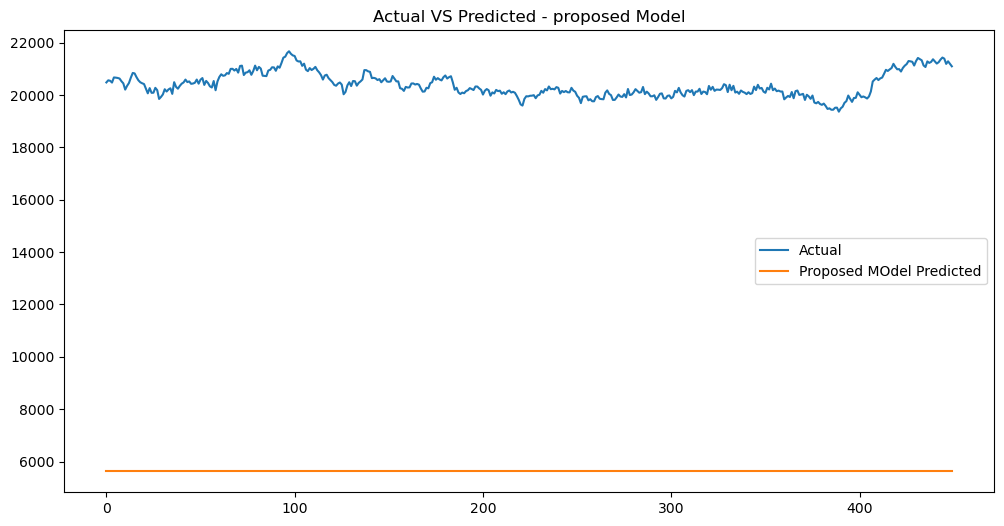

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label= 'Actual')
plt.plot(pred_proposed, label= 'Proposed MOdel Predicted')
plt.legend()
plt.title('Actual VS Predicted - proposed Model')
plt.show()

**Create Comparative Result Table**

In [30]:
import pandas as pd

result = pd.DataFrame({
    'Model' : ['LSTM', 'CNN-LSTM', 'Proposed Hybrid'],
    'RMSE' : ['rmse_lstm', 'rmse_cnn_lstm', 'rmse_proposed'],
    'MAE' : ['mae_lstm', 'mae_cnn_lstm', 'mae_proposed']
})

result

,Model,RMSE,MAE
0,LSTM,rmse_lstm,mae_lstm
1,CNN-LSTM,rmse_cnn_lstm,mae_cnn_lstm
2,Proposed Hybrid,rmse_proposed,mae_proposed


**Plot Training And Validation Loss**

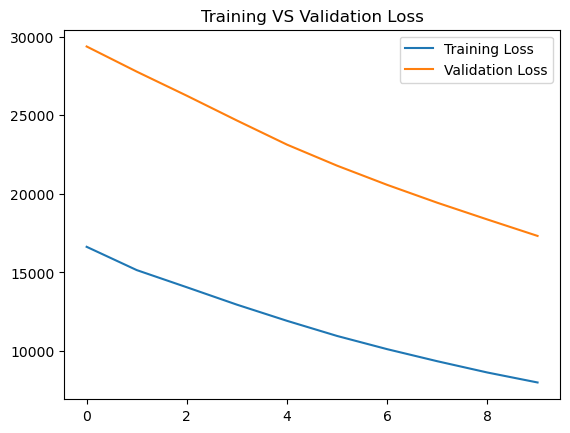

In [31]:
plt.plot(history_proposed.history['loss'], label = 'Training Loss')
plt.plot(history_proposed.history['val_loss'], label= 'Validation Loss')
plt.legend()
plt.title('Training VS Validation Loss')
plt.show()